# Gradient descent
+ 0 Normal
+ 1 Adagrad: Decrease sum of learning rate w.r.t. epoch
+ 1 RMSProp: Decrease average of learning rate w.r.t. epoch
+ 1 Momentum: Increase learning rate w.r.t. loss decreasing
+ 2 Adam

Reference: https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E6%95%B8%E5%AD%B8-%E4%B8%89-%E6%A2%AF%E5%BA%A6%E6%9C%80%E4%BD%B3%E8%A7%A3%E7%9B%B8%E9%97%9C%E7%AE%97%E6%B3%95-gradient-descent-optimization-algorithms-b61ed1478bd7

In [1]:
import matplotlib.pyplot as plt

def loss(a,b):
    return (a-1)**2+(b-2)**2
    #return 100*(a-1)**2+(b-2)**2

def grad(a,b,h=1e-4):
    l0 = loss(a,b)
    ga = (loss(a+h,b)-l0)/h
    gb = (loss(a,b+h)-l0)/h
    return ga, gb

### Normal gradient descent

i=0, a=0, b=0, loss=5
i=20, a=0.33238, b=0.66477, loss=2.22857
i=40, a=0.55427, b=1.10857, loss=0.99332
i=60, a=0.70241, b=1.40486, loss=0.44275
i=80, a=0.80131, b=1.60266, loss=0.19735
i=100, a=0.86734, b=1.73472, loss=0.08797
i=120, a=0.91142, b=1.82288, loss=0.03922
i=140, a=0.94084, b=1.88174, loss=0.01749
i=160, a=0.96049, b=1.92103, loss=0.0078
i=180, a=0.97361, b=1.94726, loss=0.00348
i=200, a=0.98236, b=1.96477, loss=0.00155
i=220, a=0.98821, b=1.97647, loss=0.00069
i=240, a=0.99211, b=1.98427, loss=0.00031
i=260, a=0.99472, b=1.98948, loss=0.00014
i=280, a=0.99646, b=1.99296, loss=6e-05
i=300, a=0.99762, b=1.99529, loss=3e-05
i=320, a=0.99839, b=1.99684, loss=1e-05
i=340, a=0.99891, b=1.99787, loss=1e-05
i=360, a=0.99926, b=1.99856, loss=0.0
i=380, a=0.99949, b=1.99902, loss=0.0


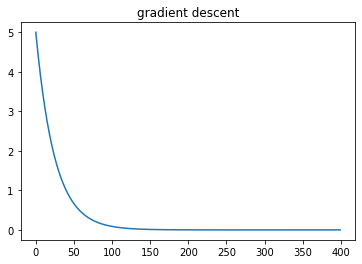

In [2]:
def gd(loss,grad,lr,a,b):
    ga, gb = grad(a,b)
    a = a-lr*ga
    b = b-lr*gb
    return a, b

a, b = 0, 0
lr = 1e-2
lossL1 = []
for i in range(400):
    l0 = loss(a,b)
    lossL1.append(l0)
    if i%20==0:
        print(f"i={i}, a={round(a,5)}, b={round(b,5)}, loss={round(l0,5)}")
    a,b = gd(loss,grad,lr,a,b)

plt.title("gradient descent")
plt.plot(lossL1)
plt.show()

### Momentum gradient descent

i=0, a=0, b=0, loss=5, va=0, vb=0,
i=10, a=0.69285, b=1.38573, loss=0.47168, va=-0.09006, vb=-0.18012,
i=20, a=1.27061, b=2.54128, loss=0.36621, va=-0.02287, vb=-0.04575,
i=30, a=1.17578, b=2.35161, loss=0.15453, va=0.02559, vb=0.05118,
i=40, a=0.95024, b=1.90052, loss=0.01237, va=0.01448, vb=0.02895,
i=50, a=0.92602, b=1.85208, loss=0.02735, va=-0.00525, vb=-0.01049,
i=60, a=0.99851, b=1.99706, loss=1e-05, va=-0.00638, vb=-0.01276,
i=70, a=1.02536, b=2.05078, loss=0.00322, va=0.00021, vb=0.00042,
i=80, a=1.00691, b=2.01387, loss=0.00024, va=0.00228, vb=0.00456,
i=90, a=0.99286, b=1.98576, loss=0.00025, va=0.00051, vb=0.00101,
i=100, a=0.99572, b=1.99149, loss=9e-05, va=-0.00067, vb=-0.00133,
i=110, a=1.00135, b=2.00275, loss=1e-05, va=-0.00035, vb=-0.00069,
i=120, a=1.00178, b=2.00361, loss=2e-05, va=0.00014, vb=0.00029,
i=130, a=0.99993, b=1.9999, loss=0.0, va=0.00016, vb=0.00031,
i=140, a=0.99931, b=1.99866, loss=0.0, va=-1e-05, vb=-2e-05,
i=150, a=0.99979, b=1.99964, loss=0.0, va=-

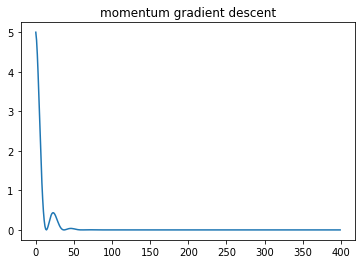

In [4]:
def mgd(loss,grad,lr,a,b,va,vb,i,m=0.9): # new va,vb,i,m
    ga, gb = grad(a,b)
    if i==0:
        va = lr*ga 
        vb = lr*gb
    else:
        va = m*va+lr*ga
        vb = m*vb+lr*gb
    a = a-va
    b = b-vb
    return a, b, va, vb

a, b = 0, 0
va, vb = 0, 0 # new va,vb
lr = 1e-2
lossL2 = []
for i in range(400):
    l0 = loss(a,b)
    lossL2.append(l0)
    if i%10==0:
        print(f"i={i}, a={round(a,5)}, b={round(b,5)}, loss={round(l0,5)}, va={round(va,5)}, vb={round(vb,5)},")
    a,b,va,vb = mgd(loss,grad,lr,a,b,va,vb,i) # new va,vb,i,m
    
plt.title("momentum gradient descent")
plt.plot(lossL2)
plt.show()

### Adam gradient descent

i=0, a=1, b=1, loss=1, ma=0,mb=0,va=0,vb=0
i=10, a=0.99481, b=1.09965, loss=0.81066, ma=-2e-05,mb=-1.23297,va=0.0,vb=0.03635
i=20, a=0.99769, b=1.19733, loss=0.64428, ma=0.00101,mb=-1.53423,va=0.0,vb=0.06519
i=30, a=1.00001, b=1.29132, loss=0.50223, ma=0.00072,mb=-1.51444,va=0.0,vb=0.08757
i=40, a=1.0006, b=1.38024, loss=0.3841, ma=0.00029,mb=-1.38851,va=0.0,vb=0.1045
i=50, a=1.00048, b=1.46318, loss=0.28818, ma=0.00011,mb=-1.23286,va=0.0,vb=0.11696
i=60, a=1.00026, b=1.53953, loss=0.21203, ma=7e-05,mb=-1.0751,va=0.0,vb=0.12584
i=70, a=1.00008, b=1.60899, loss=0.15289, ma=6e-05,mb=-0.92541,va=0.0,vb=0.13191
i=80, a=0.99994, b=1.67143, loss=0.10796, ma=5e-05,mb=-0.78763,va=0.0,vb=0.13584
i=90, a=0.99988, b=1.72689, loss=0.07459, ma=2e-05,mb=-0.66313,va=0.0,vb=0.13815
i=100, a=0.9999, b=1.77554, loss=0.05038, ma=0.0,mb=-0.55225,va=0.0,vb=0.13928
i=110, a=0.99995, b=1.81767, loss=0.03324, ma=-1e-05,mb=-0.4548,va=0.0,vb=0.13957
i=120, a=0.99997, b=1.85367, loss=0.02141, ma=-0.0,mb=-0.37026

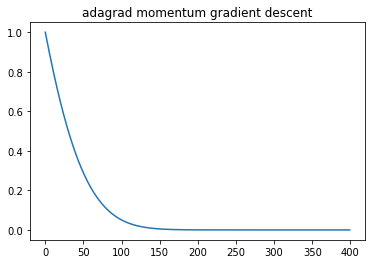

In [5]:
def adam(loss,grad,alpha,a,b,ma,mb,va,vb,i,beta1=0.9,beta2=0.999,epsilon=1e-8): # alpha=lr
    ga, gb = grad(a,b)
    ma = beta1*ma+(1-beta1)*ga
    mb = beta1*mb+(1-beta1)*gb
    va = beta2*va+(1-beta2)*ga**2
    vb = beta2*vb+(1-beta2)*gb**2
    corr_ma = ma/(1-beta1**(i+1))
    corr_mb = mb/(1-beta1**(i+1))
    corr_va = va/(1-beta2**(i+1))
    corr_vb = vb/(1-beta2**(i+1))
    a = a-alpha*corr_ma/(corr_va**0.5+epsilon)
    b = b-alpha*corr_mb/(corr_vb**0.5+epsilon)
    return a,b,ma,mb,va,vb

a, b = 1, 1
va, vb = 0, 0
ma, mb = 0, 0
alpha = 1e-2
lossL3 = []
for i in range(400):
    l0 = loss(a,b)
    lossL3.append(l0)
    if i%10==0:
        print(f"i={i}, a={round(a,5)}, b={round(b,5)}, loss={round(l0,5)}, ma={round(ma,5)},mb={round(mb,5)},va={round(va,5)},vb={round(vb,5)}")
    a,b,ma,mb,va,vb = adam(loss,grad,alpha,a,b,ma,mb,va,vb,i) # new va,vb,i,m
    
plt.title("adagrad momentum gradient descent")
plt.plot(lossL3)
plt.show()